## 1.0. Problem statement
The <i>ideal gas law</i> is given by  

$$ pV=nRT \qquad(1.1)$$

where $p$ is the absolute pressure, $V$ is the volume, $n$ is the number of moles, $R$ is the universal gas constant, and $T$ is the absolute temperature. Although this equation is widely used by engineers and scientists, it is accurate over only a limited range of pressure and temperature. Furthermore, Eq. (1.1) is more appropriate for some gases than for others. An alternative equation of state for gases is given by

$$ (p+\frac{a}{v^2})(v-b)=RT \qquad (1.2)$$

known as the <i>van der Waals equation</i>, where 
    
$$v=\frac{V}{n}$$
    
is the molal volume and $a$ and $b$ are empirical constants that depend on the particular gas. 
<p><b>(a)</b>A chemical engineering design project requires that you accurately estimate the molal volume $(v)$ of both carbon dioxide $(CO_2)$ and oxygen $(O_2)$ for a number of different temperature and pressure combinations so that appropriate containment vessels can be selected.</p> 
<p><b>(b)</b> It is also of interest to examine how well each gas conforms to the ideal gas law by comparing the molal volume as calculated by Eqs. (1.1) and (1.2). The following data are provided:</p>

$$R=0.082054\,\text{L atm/(mol K)}$$

$$\text{carbon dioxide}\, (CO_2)\begin{cases}a=3.592\\b=0.04267\end{cases} \qquad \text{oxygen}\, (O_2)\begin{cases}a=1.360\\b=0.03183\end{cases}$$



## 1.1
### Table 1. Molal volumes computed using Ideal gas and van der Waals Laws.


<img src="phys3.png" width="1000" height="1200" /><br>

In [2]:
#1.2
import numpy as np
def f_I(p, T):
    v=0.082054*T/p
    return v

def f_V(x_r,p,T,a,b):
    val=(p+a/x_r**2)*(x_r-b)-0.082054*T
    return val

def bisect(x_l,x_u, p, T,a,b):
    err=100
    x_ro=0
    if f_V(x_l,p,T,a,b)*f_V(x_u,p,T,a,b)<0:
        while err>0.01:
            x_r=(x_l+x_u)/2
            if f_V(x_l,p,T,a,b)*f_V(x_r,p,T,a,b)<0:
                x_u=x_r
            elif f_V(x_l,p,T,a,b)*f_V(x_r,p,T,a,b)>0:
                x_l=x_r
            else:
                err=0
                return x_r
            err=abs((x_r-x_ro)/x_r)*100
            x_ro=x_r
        return x_r
    else:
        print('you must try another interval')
p=np.array([1,10,100])
print(f'for CO_2 molal volume is {round(bisect(24,25,p[0],300,3.592,0.04267),2)} when P is {p[0]}')
print(f'for O_2 molal volume is {round(bisect(24,25,p[0],300,1.360,0.03183),2)} when P is {p[0]}')
print(f'for CO_2 molal volume is {round(bisect(2,3,p[1],300,3.592,0.04267),2)} when P is {p[1]}')
print(f'for O_2 molal volume is {round(bisect(2,3,p[1],300,1.360,0.03183),2)} when P is {p[1]}')
print(f'for CO_2 molal volume is {round(bisect(0.01,0.3,p[2],300,3.592,0.04267),2)} when P is {p[2]}')
print(f'for O_2 molal volume is {round(bisect(0.01,0.3,p[2],300,1.360,0.03183),2)} when P is {p[2]}')

for CO_2 molal volume is 24.51 when P is 1
for O_2 molal volume is 24.59 when P is 1
for CO_2 molal volume is 2.35 when P is 10
for O_2 molal volume is 2.44 when P is 10
for CO_2 molal volume is 0.08 when P is 100
for O_2 molal volume is 0.23 when P is 100


In [45]:
#1.3
import numpy as np
def f_I(p, T):
    v=0.082054*T/p
    return v

def f_V(x_r,p,T,a,b):
    val=(p+a/x_r**2)*(x_r-b)-0.082054*T
    return val

def false(x_l,x_u, p, T,a,b):
    err=100
    x_ro=0
    if f_V(x_l,p,T,a,b)*f_V(x_u,p,T,a,b)<0:
        while err>0.01:
            x_r=x_u-(f_V(x_u,p,T,a,b)*(x_l-x_u))/(f_V(x_l,p,T,a,b)-f_V(x_u,p,T,a,b))
            if f_V(x_l,p,T,a,b)*f_V(x_r,p,T,a,b)<0:
                x_u=x_r
            elif f_V(x_l,p,T,a,b)*f_V(x_r,p,T,a,b)>0:
                x_l=x_r
            else:
                err=0
                return x_r
            err=abs((x_r-x_ro)/x_r)*100
            x_ro=x_r
        return x_r
p=np.array([1,10,100])
print(f'for CO_2 molal volume is {round(false(40,41,p[0],500,3.592,0.04267),2)} when P is {p[0]}')
print(f'for O_2 molal volume is {round(false(40,42,p[0],500,1.360,0.03183),2)} when P is {p[0]}')
print(f'for CO_2 molal volume is {round(false(4,4.5,p[1],500,3.592,0.04267),2)} when P is {p[1]}')
print(f'for O_2 molal volume is {round(false(4,4.5,p[1],500,1.360,0.03183),2)} when P is {p[1]}')
print(f'for CO_2 molal volume is {round(false(0.1,0.5,p[2],500,3.592,0.04267),2)} when P is {p[2]}')
print(f'for O_2 molal volume is {round(false(0.1,0.5,p[2],500,1.360,0.03183),2)} when P is {p[2]}')


for CO_2 molal volume is 40.98 when P is 1
for O_2 molal volume is 41.03 when P is 1
for CO_2 molal volume is 4.06 when P is 10
for O_2 molal volume is 4.1 when P is 10
for CO_2 molal volume is 0.37 when P is 100
for O_2 molal volume is 0.41 when P is 100


In [47]:
#1.4
import numpy as np
def f_I(p, T):
    v=0.082054*T/p
    return v

def f_V(x_r,p,T,a,b):
    val=(p+a/x_r**2)*(x_r-b)-0.082054*T
    return val

def secant(x_old,x_old1,p, T,a,b):
    err=100
    while err>0.01:
            x_new=x_old-(f_V(x_old,p,T,a,b)*(x_old1-x_old))/(f_V(x_old1,p,T,a,b)-f_V(x_old,p,T,a,b))
            err=abs((x_new-x_old)/x_new)*100
            x_old1=x_old
            x_old=x_new
    return x_new
p=np.array([1,10,100])
print(f'for CO_2 molal volume is {round(secant(23,24,p[0],700,3.592,0.04267),2)} when P is {p[0]}')
print(f'for O_2 molal volume is {round(secant(23,24,p[0],700,1.360,0.03183),2)} when P is {p[0]}')
print(f'for CO_2 molal volume is {round(secant(1,3,p[1],700,3.592,0.04267),2)} when P is {p[1]}')
print(f'for O_2 molal volume is {round(secant(1,3,p[1],700,1.360,0.03183),2)} when P is {p[1]}')
print(f'for CO_2 molal volume is {round(secant(0.01,0.3,p[2],700,3.592,0.04267),2)} when P is {p[2]}')
print(f'for O_2 molal volume is {round(secant(0.01,0.3,p[2],700,1.360,0.03183),2)} when P is {p[2]}')

for CO_2 molal volume is 57.42 when P is 1
for O_2 molal volume is 57.45 when P is 1
for CO_2 molal volume is 5.72 when P is 10
for O_2 molal volume is 5.75 when P is 10
for CO_2 molal volume is 0.56 when P is 100
for O_2 molal volume is 0.58 when P is 100


## 2.0 Problem Statement

The equation of Kepler is:

$$E=M+e\,\text{sin}E \qquad (2.1)$$

where $E$ - eccentric anomaly of the planet, $M$ - mean anomaly and $e$ is the eccentricity.
Employ the Newton-Raphson numerical algorithm to calculate the true anomaly $E$ for the planet Mars when the mean anomaly is $M=98.679^{\circ}$. The eccentricity of the orbit of Mars around the Sun is $e=0.09340$. For the purposes of calculations, angles in degrees should be converted to radians. 

1)Provide $E$ in degress for $n=1, n=3$ and $n=5$ number of iterations using Newton-Raphson's method. 
<p>2)Provide $E$ in degress for 1, 3 and 5 number of iterations using the fixed-point iteration method with the same initial guesses $E_{ig}$ as in 1).</p>
<p>3)Plot function $E(M)$ for $M$ in the range $[-\pi,\pi]$ with a step size $\Delta M=0.1$ and choose three values of eccentricity $e=0.00, 0.09, 0.90$. $E$ and $M$ should be in radians. Use your Newton-Raphson's method implementation to evaluate $E(M)$ at fixed number of iterations $n=5$.  </p>

In [49]:
#2.1
def func(x_old,e,M):
        return M+e*np.sin(x_old)-x_old
    
def funcDer(x_old,e):
    return e*np.cos(x_old)-1

def NR(x_old,e,M,n):
    for i in range (1,n+1):
        x_new=x_old-func(x_old,e,M)/funcDer(x_old,e)
        x_old=x_new
      
    return x_new


M=np.arange(-np.pi,np.pi+0.1,0.1) 
print(f'{NR(1,0.09340,98.697*np.pi/180,1)}')
print(f'{NR(1,0.09340,98.697*np.pi/180,3)}')
print(f'{NR(1,0.09340,98.697*np.pi/180,5)}')

    

1.84376074252714
1.813255702800168
1.813255702725876


In [19]:
#2.2
def fixed(x_old,e,M,n):
    for i in range(1,n+1):
        x_new=M*np.pi/180+e*np.sin(x_old)
        x_old=x_new
    return x_new

print(f'{fixed(1,0.09340,98.697,1)}')
print(f'{fixed(1,0.09340,98.697,3)}')
print(f'{fixed(1,0.09340,98.697,5)}')

1.801181001821901
1.8132497760745359
1.813255699745651


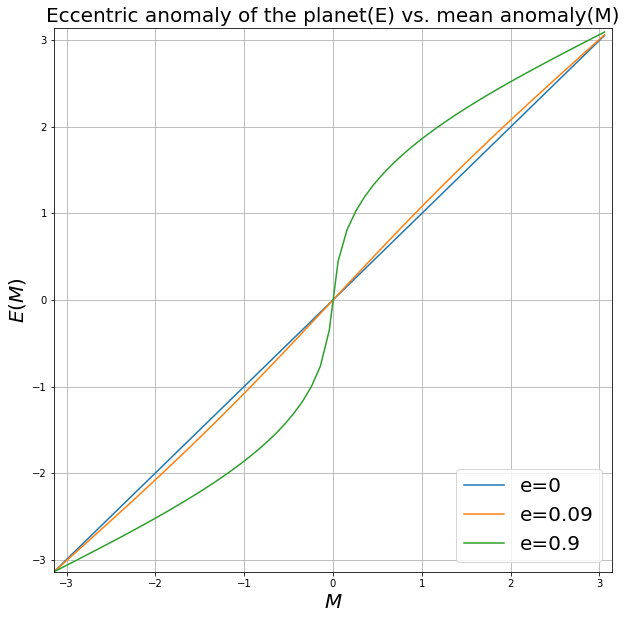

In [63]:
#2.3


import matplotlib.pyplot as plt

M=np.arange(-np.pi,np.pi,0.1) 
plt.figure(figsize=(10, 10))
plt.xlim(-np.pi,np.pi)
plt.ylim(-np.pi,np.pi)
plt.plot(M,NR(M,0,M,5),label='e=0')
plt.plot(M,NR(M,0.09,M,5),label='e=0.09')
plt.plot(M,NR(M,0.90,M,5),label='e=0.9')
plt.xlabel(r'$M$',size=20)
plt.ylabel(r'$E(M)$',size=20)
plt.title('Eccentric anomaly of the planet(E) vs. mean anomaly(M)', fontsize='20')
plt.legend(loc='lower right', fontsize='20')
plt.grid()
plt.show()